In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load in results

In [5]:
df_BP = pd.read_csv('../data/results/predictions_BP_20241025_035917.csv')
df_CVX = pd.read_csv('../data/results/predictions_CVX_20241025_101130.csv')
df_EQNR = pd.read_csv('../data/results/predictions_EQNR_20241026_084742.csv')
df_OXY = pd.read_csv('../data/results/predictions_OXY_20241026_135829.csv')
df_SHEL = pd.read_csv('../data/results/predictions_SHEL_20241026_164529.csv')
df_XOM = pd.read_csv('../data/results/predictions_XOM_20241027_082213.csv')
df_TFT = pd.read_csv('../data/results/tft_predictions.csv')
df_train = pd.read_csv('../data/results/train_data.csv')
df_transformer = pd.read_csv('../data/results/transformer_predictions.csv')
df_ardl_BP = pd.read_csv('../data/results/ARDL_predict_BP_3.csv')
df_ardl_CVX = pd.read_csv('../data/results/ARDL_predicted_CVX_3.csv')
df_ardl_EQNR = pd.read_csv('../data/results/ARDL_predicted_EQNR_3.csv')
df_ardl_OXY = pd.read_csv('../data/results/ARDL_predicted_OXY_3.csv')
df_ardl_SHEL = pd.read_csv('../data/results/ARDL_predicted_SHEL_3.csv')
df_ardl_XOM = pd.read_csv('../data/results/ARDL_predicted_XOM_3.csv')
df_sarima_BP = pd.read_csv('../data/results/BP_SARIMA_111_11121.csv', index_col=0)
df_sarima_CVX = pd.read_csv('../data/results/CVX_SARIMA_210_11121.csv', index_col=0)
df_sarima_EQNR = pd.read_csv('../data/results/EQNR_SARIMA_111_11121.csv', index_col=0)
df_sarima_OXY = pd.read_csv('../data/results/OXY_SARIMA_111_11121.csv', index_col=0)
df_sarima_SHEL = pd.read_csv('../data/results/SHEL_SARIMA_111_11121.csv', index_col=0)
df_sarima_XOM = pd.read_csv('../data/results/XOM_SARIMA_111_11021.csv', index_col=0)

# Check if data loaded correctly
for name, df in zip(['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM', 'TFT'],
                    [df_BP, df_CVX, df_EQNR, df_OXY, df_SHEL, df_XOM, df_TFT]):
    print(f"{name} DataFrame:")
    print(df.head(), "\n")

# Check if data loaded correctly
for name, df in zip(['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM'],
                    [df_ardl_BP, df_ardl_CVX, df_ardl_EQNR, df_ardl_OXY, df_ardl_SHEL, df_ardl_XOM]):
    print(f"{name} DataFrame:")
    print(df.head(), "\n")

# Check if data loaded correctly
for name, df in zip(['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM'],
                    [df_sarima_BP, df_sarima_CVX, df_sarima_EQNR, df_sarima_OXY, df_sarima_SHEL, df_sarima_XOM]):
    print(f"{name} DataFrame:")
    print(df.head(), "\n")

BP DataFrame:
         Date  Naive Prediction  Predicted  Actual
0  2020-10-12             17.36  27.393833   17.24
1  2020-10-13             17.24  27.393894   16.68
2  2020-10-14             16.68  27.375286   16.59
3  2020-10-15             16.59  27.435837   16.44
4  2020-10-16             16.44  27.481180   16.25 

CVX DataFrame:
         Date  Naive Prediction  Predicted  Actual
0  2020-10-12             74.00  75.676110   74.51
1  2020-10-13             74.51  76.036340   73.40
2  2020-10-14             73.40  75.331910   72.95
3  2020-10-15             72.95  75.012850   73.51
4  2020-10-16             73.51  75.481316   72.89 

EQNR DataFrame:
         Date  Naive Prediction  Predicted  Actual
0  2020-10-12             14.80  14.962290   14.70
1  2020-10-13             14.70  14.859044   14.47
2  2020-10-14             14.47  14.653502   14.50
3  2020-10-15             14.50  14.679657   14.30
4  2020-10-16             14.30  14.516518   14.17 

OXY DataFrame:
         Date  N

In [6]:
# Combine the first 5 columns into 1 dataframe of 6 stocks.
# Rename 'Predicted' columns to include stock tickers
df_BP.rename(columns={'Predicted': 'BP'}, inplace=True)
df_CVX.rename(columns={'Predicted': 'CVX'}, inplace=True)
df_EQNR.rename(columns={'Predicted': 'EQNR'}, inplace=True)
df_OXY.rename(columns={'Predicted': 'OXY'}, inplace=True)
df_SHEL.rename(columns={'Predicted': 'SHEL'}, inplace=True)
df_XOM.rename(columns={'Predicted': 'XOM'}, inplace=True)
df_TFT.rename(columns={'time': 'Date'}, inplace=True)
df_transformer.rename(columns={'time': 'Date'}, inplace=True)
df_ardl_BP.rename(columns={'predicted value': 'BP', 'date': 'Date'}, inplace=True)
df_ardl_CVX.rename(columns={'predicted value': 'CVX', 'date': 'Date'}, inplace=True)
df_ardl_EQNR.rename(columns={'predicted value': 'EQNR', 'date': 'Date'}, inplace=True)
df_ardl_OXY.rename(columns={'predicted value': 'OXY', 'date': 'Date'}, inplace=True)
df_ardl_SHEL.rename(columns={'predicted value': 'SHEL', 'date': 'Date'}, inplace=True)
df_ardl_XOM.rename(columns={'predicted value': 'XOM', 'date': 'Date'}, inplace=True)
df_sarima_BP.rename(columns={'predicted': 'BP', 'datetime': 'Date'}, inplace=True)
df_sarima_CVX.rename(columns={'predicted': 'CVX', 'datetime': 'Date'}, inplace=True)
df_sarima_EQNR.rename(columns={'predicted': 'EQNR', 'datetime': 'Date'}, inplace=True)
df_sarima_OXY.rename(columns={'predicted': 'OXY', 'datetime': 'Date'}, inplace=True)
df_sarima_SHEL.rename(columns={'predicted': 'SHEL', 'datetime': 'Date'}, inplace=True)
df_sarima_XOM.rename(columns={'predicted': 'XOM', 'datetime': 'Date'}, inplace=True)

# Merge the DataFrames on the 'Date' column
dfs = [df_BP, df_CVX, df_EQNR, df_OXY, df_SHEL, df_XOM]
df_lstm = dfs[0]
for df in dfs[1:]:
    df_lstm = pd.merge(df_lstm, df[['Date', df.columns[2]]], on='Date')

# Merge the DataFrames on the 'Date' column
dfs = [df_ardl_BP, df_ardl_CVX, df_ardl_EQNR, df_ardl_OXY, df_ardl_SHEL, df_ardl_XOM]
df_ardl = dfs[0]
for df in dfs[1:]:
    df_ardl = pd.merge(df_ardl, df[['Date', df.columns[1]]], on='Date')

# Merge the DataFrames on the 'Date' column
dfs = [df_sarima_BP, df_sarima_CVX, df_sarima_EQNR, df_sarima_OXY, df_sarima_SHEL, df_sarima_XOM]
df_sarima = dfs[0][['Date', dfs[0].columns[2]]]
for df in dfs[1:]:
    df_sarima = pd.merge(df_sarima, df[['Date', df.columns[2]]], on='Date')

# Drop the naive and actual column
df_lstm = df_lstm.drop(['Naive Prediction', 'Actual'], axis=1)
# Check the merged DataFrame
print("df_lstm:")
print(df_lstm.head())

# Check the merged DataFrame
print("df_ardl:")
print(df_ardl.head())

# Check the merged DataFrame
print("df_sarima:")
print(df_sarima.head())

df_lstm:
         Date         BP        CVX       EQNR        OXY       SHEL  \
0  2020-10-12  27.393833  75.676110  14.962290  58.665264  41.846745   
1  2020-10-13  27.393894  76.036340  14.859044  58.669537  41.865078   
2  2020-10-14  27.375286  75.331910  14.653502  58.674760  41.891693   
3  2020-10-15  27.435837  75.012850  14.679657  58.685660  41.911770   
4  2020-10-16  27.481180  75.481316  14.516518  58.693470  41.908660   

         XOM  
0  57.887123  
1  57.886925  
2  57.884468  
3  57.875250  
4  57.866530  
df_ardl:
         Date         BP        CVX       EQNR        OXY       SHEL  \
0  2020-10-12  17.684410  75.447117  15.069053  11.055993  27.228474   
1  2020-10-13  17.776400  76.102304  15.199836  11.115413  27.465355   
2  2020-10-14  17.716089  76.085700  15.151083  10.969373  27.431887   
3  2020-10-15  17.673011  76.289740  15.111276  10.985651  27.308907   
4  2020-10-16  17.537346  75.872941  15.022865  10.814008  27.092866   

         XOM  
0  35.34556

In [7]:
# Initialize empty DataFrames for naive predictions and actual values
df_naive = pd.DataFrame()
df_actual = pd.DataFrame()

# List of original stock DataFrames
stock_dfs = [df_BP, df_CVX, df_EQNR, df_OXY, df_SHEL, df_XOM]
stocks = ['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM']

# Loop through each stock DataFrame to extract the relevant columns
for stock_df, stock in zip(stock_dfs, stocks):
    # Extract 'Naive Prediction' and 'Actual' columns
    df_naive[stock] = stock_df['Naive Prediction']
    df_actual[stock] = stock_df['Actual']

# Add the 'Date' column to both DataFrames from the first stock DataFrame (assuming they all have the same date range)
df_naive['Date'] = df_BP['Date']
df_actual['Date'] = df_BP['Date']

# Reorder columns to have 'Date' first
df_naive = df_naive[['Date'] + stocks]
df_actual = df_actual[['Date'] + stocks]

# Check the new DataFrames
print("df_naive:")
print(df_naive.head())

print("\ndf_actual:")
print(df_actual.head())

df_naive:
         Date     BP    CVX   EQNR    OXY   SHEL    XOM
0  2020-10-12  17.36  74.00  14.80  10.82  26.66  34.74
1  2020-10-13  17.24  74.51  14.70  10.81  26.30  34.63
2  2020-10-14  16.68  73.40  14.47  10.52  25.82  34.22
3  2020-10-15  16.59  72.95  14.50  10.45  25.79  34.15
4  2020-10-16  16.44  73.51  14.30  10.61  25.37  34.45

df_actual:
         Date     BP    CVX   EQNR    OXY   SHEL    XOM
0  2020-10-12  17.24  74.51  14.70  10.81  26.30  34.63
1  2020-10-13  16.68  73.40  14.47  10.52  25.82  34.22
2  2020-10-14  16.59  72.95  14.50  10.45  25.79  34.15
3  2020-10-15  16.44  73.51  14.30  10.61  25.37  34.45
4  2020-10-16  16.25  72.89  14.17  10.09  25.27  34.10


In [8]:
# Convert all dataframes to date
df_naive['Date'] = pd.to_datetime(df_naive['Date']).dt.date
df_actual['Date'] = pd.to_datetime(df_actual['Date']).dt.date
df_lstm['Date'] = pd.to_datetime(df_lstm['Date']).dt.date
df_TFT['Date'] = pd.to_datetime(df_TFT['Date']).dt.date
df_transformer['Date'] = pd.to_datetime(df_transformer['Date']).dt.date
df_ardl['Date'] = pd.to_datetime(df_ardl['Date']).dt.date
df_sarima['Date'] = pd.to_datetime(df_sarima['Date']).dt.date

In [9]:
# Assuming 'Date' column in df_TFT and df_actual are already in datetime format
df_TFT_filtered = df_TFT[df_TFT['Date'].isin(df_actual['Date'])].copy()

# Optional: Ensure the filtered DataFrame is sorted by Date
df_TFT_filtered.sort_values(by='Date', inplace=True)

# Resetting index for proper alignment
df_TFT_filtered.reset_index(drop=True, inplace=True)

In [10]:
# Assuming 'Date' column in df_TFT and df_actual are already in datetime format
df_transformer_filtered = df_transformer[df_transformer['Date'].isin(df_actual['Date'])].copy()

# Optional: Ensure the filtered DataFrame is sorted by Date
df_transformer_filtered.sort_values(by='Date', inplace=True)

# Resetting index for proper alignment
df_transformer_filtered.reset_index(drop=True, inplace=True)

In [11]:
# Assuming 'Date' column in df_TFT and df_actual are already in datetime format
df_sarima_filtered = df_sarima[df_sarima['Date'].isin(df_actual['Date'])].copy()

# Optional: Ensure the filtered DataFrame is sorted by Date
df_sarima_filtered.sort_values(by='Date', inplace=True)

# Resetting index for proper alignment
df_sarima_filtered.reset_index(drop=True, inplace=True)

In [12]:
df_TFT_filtered.shape

(1007, 7)

In [13]:
df_transformer_filtered.shape

(1007, 7)

In [14]:
df_sarima_filtered.shape

(1007, 7)

# Step 2: Plot the naive vs predicted vs actual

In [15]:
# List of the 6 stocks you're interested in
stocks = ['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM']

# Create a DataFrame with the date and close prices for the specified stocks
df_training = df_train[df_train['symbol'].isin(stocks)][['date', 'symbol', 'close']]

# Pivot the DataFrame to have the date as the index and stocks as columns
df_training = df_training.pivot(index='date', columns='symbol', values='close').reset_index()

# Rename the columns for clarity
df_training = df_training.rename(columns={'date': 'Date'})  # Rename 'date' to 'Date'

# Optional: Ensure the filtered DataFrame is sorted by Date
df_training.sort_values(by='Date', inplace=True)

# Drop the index name ('symbol') after pivoting
df_training.columns.name = None  # This removes the index name

# Resetting index for proper alignment
df_training.reset_index(drop=True, inplace=True)

# Check the new DataFrame
print(df_training.tail())

            Date     BP    CVX   EQNR    OXY   SHEL    XOM
2731  2020-10-05  17.19  72.70  14.52  10.51  25.41  33.74
2732  2020-10-06  16.93  72.30  14.29  10.13  25.30  33.39
2733  2020-10-07  17.03  73.78  14.34  10.28  25.59  33.50
2734  2020-10-08  17.49  75.22  14.63  11.18  26.44  35.26
2735  2020-10-09  17.36  74.00  14.80  10.82  26.66  34.74


In [16]:
def plot_all_stocks_matplotlib(stocks, df_training):
    """
    Plots predicted vs actual vs naive for a list of stocks using Matplotlib in subplots.
    Also shows the range of the training data as horizontal lines.
    """
    # Set font size globally
    plt.style.use('ggplot')
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 20,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 14
    })

    num_stocks = len(stocks)
    nrows = 2
    ncols = 3
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 20))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Convert 'Date' column to datetime for all relevant DataFrames
    df_naive['Date'] = pd.to_datetime(df_naive['Date'])
    df_actual['Date'] = pd.to_datetime(df_actual['Date'])
    df_training['Date'] = pd.to_datetime(df_training['Date'])

    for i, stock in enumerate(stocks):
        # Get the LSTM predictions DataFrame for the current stock
        lstm_data = df_lstm[['Date', stock]].copy()
        lstm_data['Date'] = pd.to_datetime(lstm_data['Date'])

        # Calculate min and max of the training data for the current stock
        training_min = df_training[stock].min()
        training_max = df_training[stock].max()
        if stock == 'OXY':
            training_min = 47
        if stock == 'XOM':
            training_min = 52

        # Plot actual values
        axes[i].plot(df_actual['Date'], df_actual[stock], label='Actual', color='black', linewidth=2)

        # Plot naive predictions
        axes[i].plot(df_naive['Date'], df_naive[stock], label='Naive', color='olive', linewidth=2)

        # Plot LSTM predictions
        axes[i].plot(lstm_data['Date'], lstm_data[stock], label=f'{stock} LSTM Predicted', color='blue', linewidth=1)

        # Plot SARIMA predictions (if available)
        if stock in df_sarima_filtered.columns:
            sarima_data = df_sarima_filtered[['Date', stock]].copy()
            sarima_data['Date'] = pd.to_datetime(sarima_data['Date'])
            axes[i].plot(sarima_data['Date'], sarima_data[stock], label=f'{stock} SARIMA Predicted', color='orange', linewidth=1, alpha=0.7)

        # Plot ARDL predictions (if available)
        if stock in df_ardl.columns:
            ardl_data = df_ardl[['Date', stock]].copy()
            ardl_data['Date'] = pd.to_datetime(ardl_data['Date'])
            axes[i].plot(ardl_data['Date'], ardl_data[stock], label=f'{stock} ARDL Predicted', color='brown', linewidth=1, alpha=0.7)

        # Plot TFT predictions (if available)
        if stock in df_TFT_filtered.columns:
            tft_data = df_TFT[['Date', stock]].copy()
            tft_data['Date'] = pd.to_datetime(tft_data['Date'])
            axes[i].plot(tft_data['Date'], tft_data[stock], label=f'{stock} TFT Predicted', color='green', linewidth=1)

        # Plot transformer predictions (if available)
        if stock in df_transformer_filtered.columns:
            transformer_data = df_transformer_filtered[['Date', stock]].copy()
            transformer_data['Date'] = pd.to_datetime(transformer_data['Date'])
            axes[i].plot(transformer_data['Date'], transformer_data[stock], label=f'{stock} Transformer Predicted', color='purple', linewidth=1)

        # Plot the range of the training data as horizontal lines
        axes[i].axhline(training_min, color='red', linewidth=1)
        axes[i].axhline(training_max, color='red', linewidth=1)

        # Add text labels for training min and max
        axes[i].text(df_actual['Date'].iloc[0], training_min, 'Training Min',
                     color='red', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
        axes[i].text(df_actual['Date'].iloc[0], training_max, 'Training Max',
                     color='red', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

        # Customize each subplot
        axes[i].set_title(f"{stock} - Predicted vs Actual vs Naive")
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Price')
        axes[i].legend(loc='lower right')
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)

        # Format x-axis to show date only
        axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

    # Hide any unused subplots if there are fewer stocks than subplot slots
    for j in range(num_stocks, nrows * ncols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

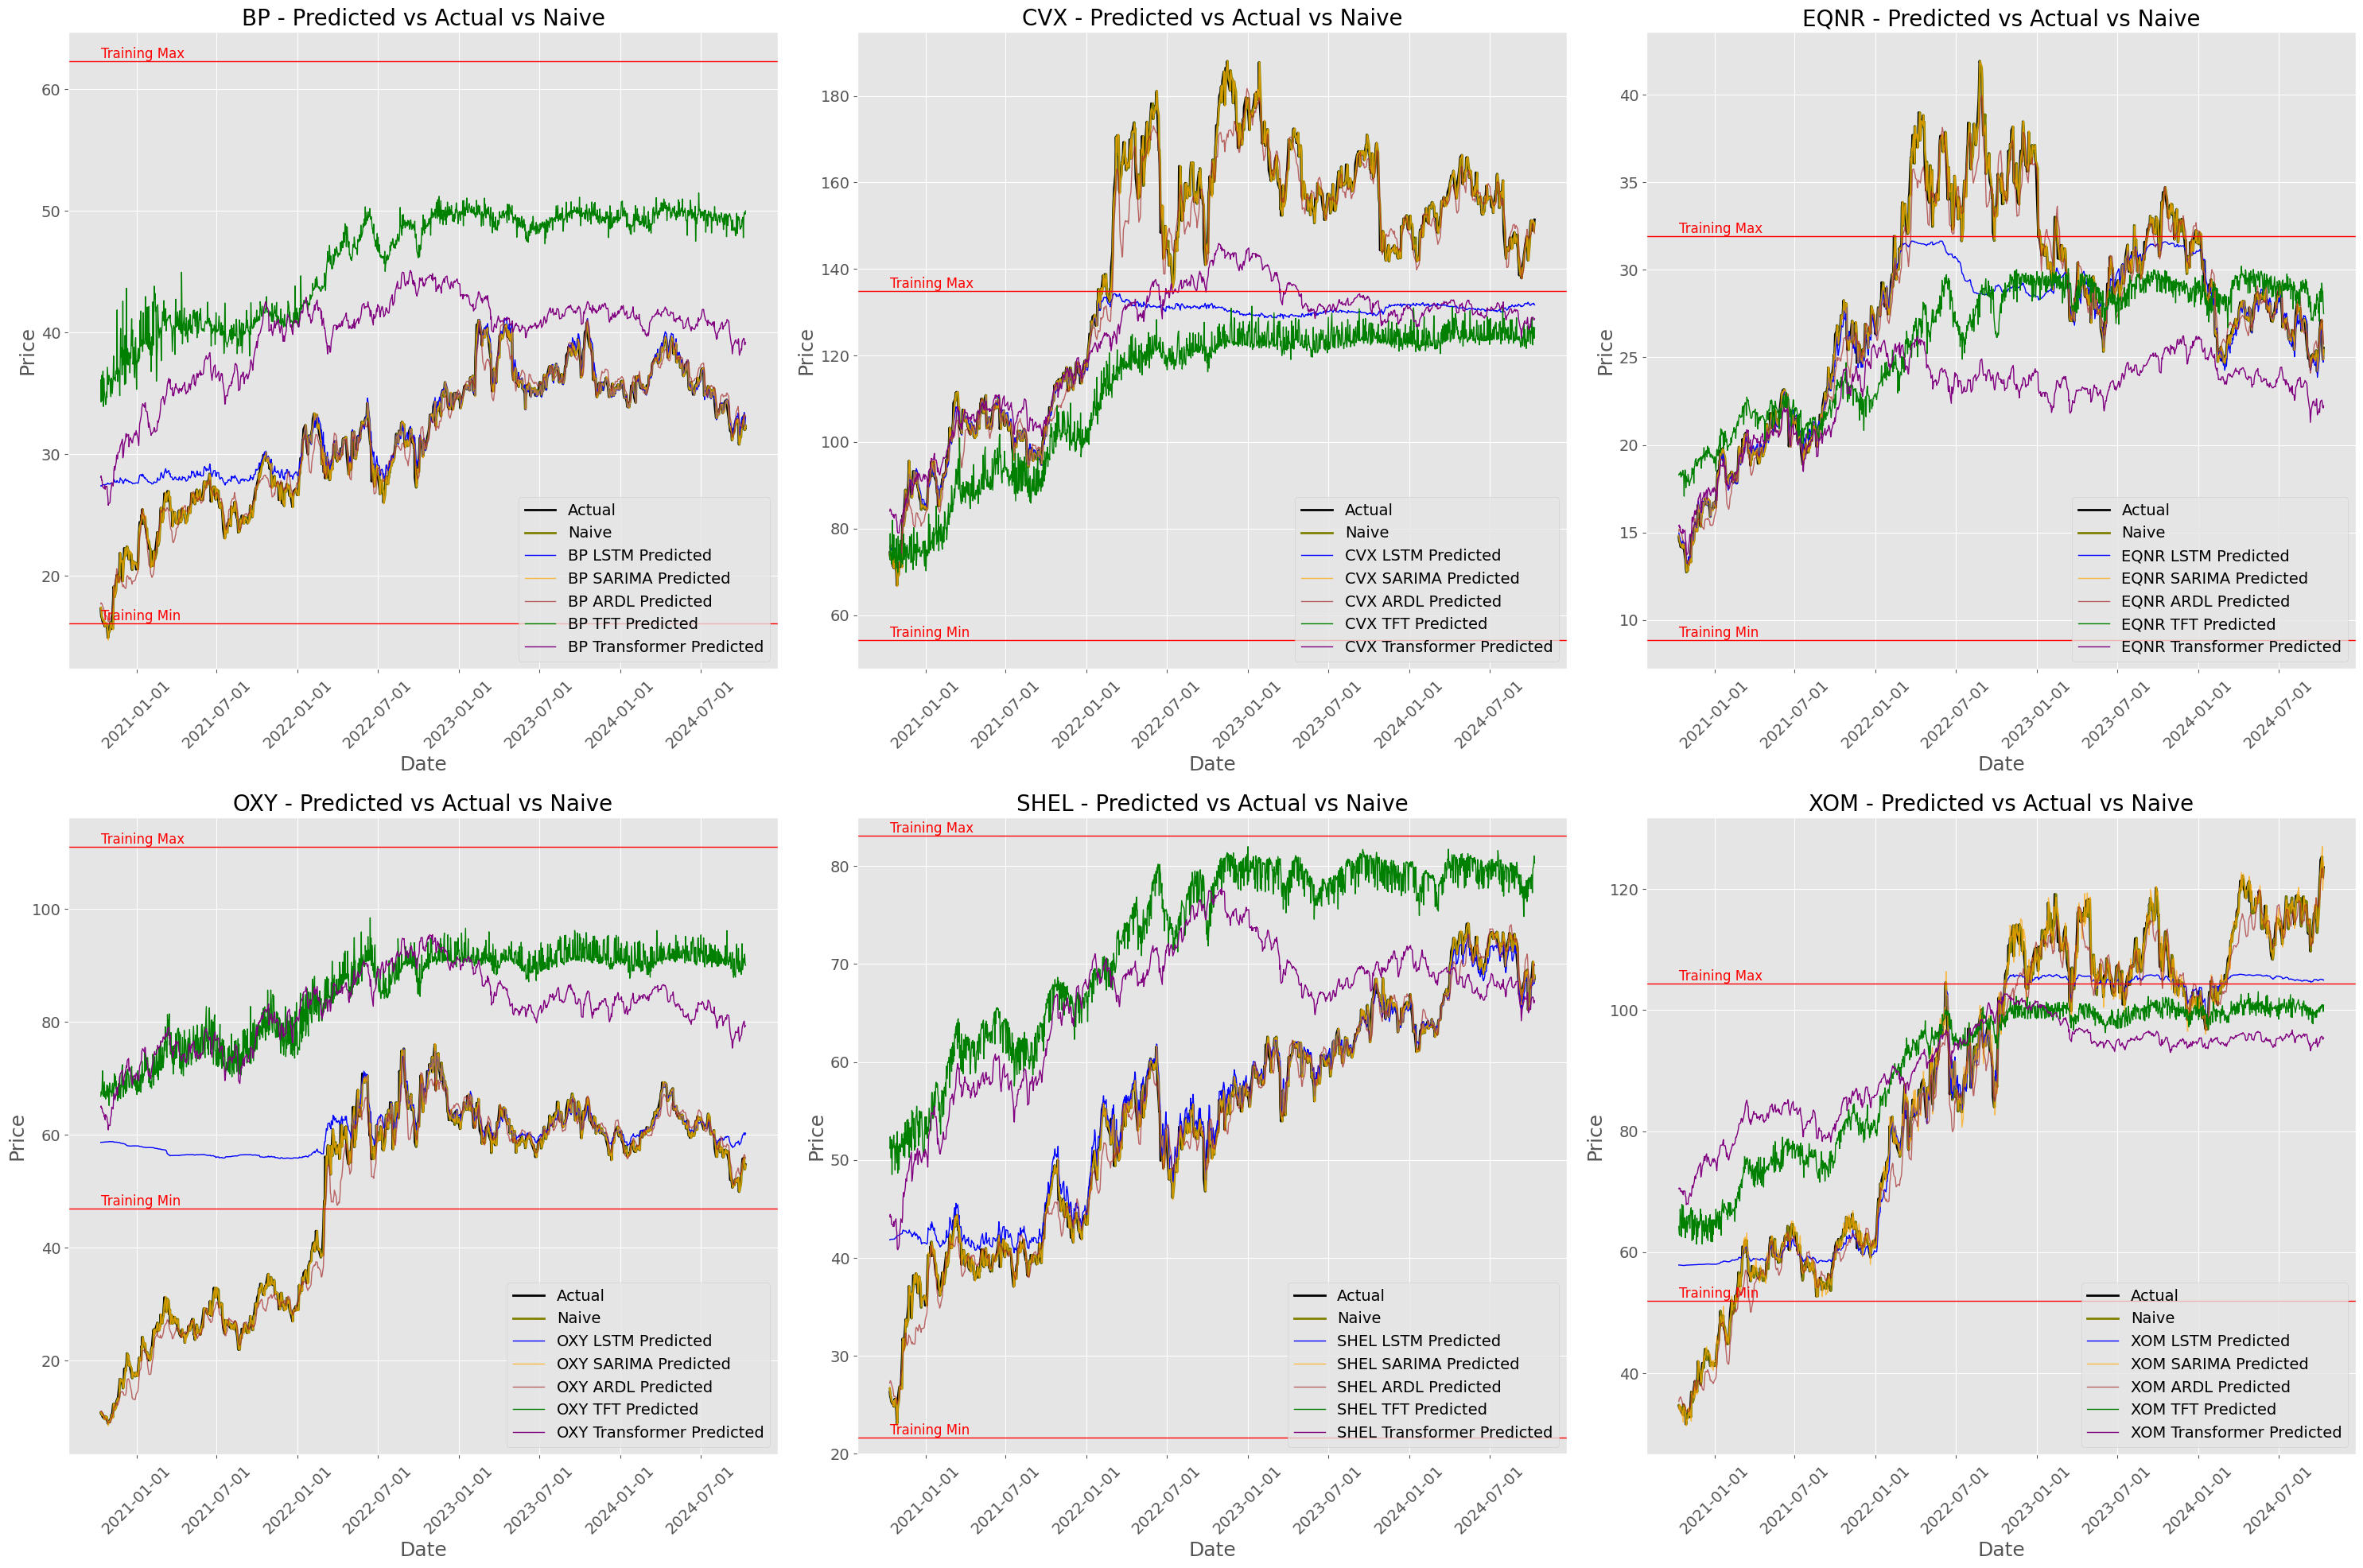

In [17]:
stocks = ['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM']
plot_all_stocks_matplotlib(stocks, df_training)

# Step 3: Plot predicted vs actual vs naive with training data

In [18]:
def plot_all_stocks_matplotlib_with_training(stocks):
    """
    Plots predicted vs actual vs naive for a list of stocks using Matplotlib in subplots.
    """
    plt.style.use('ggplot')
    num_stocks = len(stocks)
    nrows = 6
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 50))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Convert 'Date' column to datetime for all relevant DataFrames
    df_naive['Date'] = pd.to_datetime(df_naive['Date'])
    df_actual['Date'] = pd.to_datetime(df_actual['Date'])
    df_training['Date'] = pd.to_datetime(df_training['Date'])

    for i, stock in enumerate(stocks):
        # Get training data
        training_data = df_training[['Date', stock]].copy()
        training_data['Date'] = pd.to_datetime(training_data['Date'])

        # Get the LSTM predictions DataFrame for the current stock
        lstm_data = df_lstm[['Date', stock]].copy()
        lstm_data['Date'] = pd.to_datetime(lstm_data['Date'])

        # Plot training values
        axes[i].plot(training_data['Date'], training_data[stock], label='training', color='black', linewidth=2)

        # Plot actual values
        axes[i].plot(df_actual['Date'], df_actual[stock], label='Actual', color='black', linewidth=2)

        # Plot naive predictions
        axes[i].plot(df_naive['Date'], df_naive[stock], label='Naive', color='red', linestyle='--')

        # Plot LSTM predictions
        axes[i].plot(lstm_data['Date'], lstm_data[stock], label=f'{stock} LSTM Predicted', color='blue')

        # Plot SARIMA predictions (if available)
        if stock in df_sarima_filtered.columns:
            sarima_data = df_sarima_filtered[['Date', stock]].copy()
            sarima_data['Date'] = pd.to_datetime(sarima_data['Date'])
            axes[i].plot(sarima_data['Date'], sarima_data[stock], label=f'{stock} SARIMA Predicted', color='orange')

        # Plot ARDL predictions (if available)
        if stock in df_ardl.columns:
            ardl_data = df_ardl[['Date', stock]].copy()
            ardl_data['Date'] = pd.to_datetime(ardl_data['Date'])
            axes[i].plot(ardl_data['Date'], ardl_data[stock], label=f'{stock} ARDL Predicted', color='pink')

        # Plot TFT predictions (if available)
        if stock in df_TFT_filtered.columns:
            tft_data = df_TFT[['Date', stock]].copy()
            tft_data['Date'] = pd.to_datetime(tft_data['Date'])
            axes[i].plot(tft_data['Date'], tft_data[stock], label=f'{stock} TFT Predicted', color='green')

        # Plot transformer predictions (if available)
        if stock in df_transformer_filtered.columns:
            transformer_data = df_transformer_filtered[['Date', stock]].copy()
            transformer_data['Date'] = pd.to_datetime(transformer_data['Date'])
            axes[i].plot(transformer_data['Date'], transformer_data[stock], label=f'{stock} Transformer Predicted', color='purple')

        # Customize each subplot
        axes[i].set_title(f"{stock} - Predicted vs Actual vs Naive")
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Price')
        axes[i].legend()
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)

        # Format x-axis to show date only
        axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

    # Hide any unused subplots if there are fewer stocks than subplot slots
    for j in range(num_stocks, nrows * ncols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

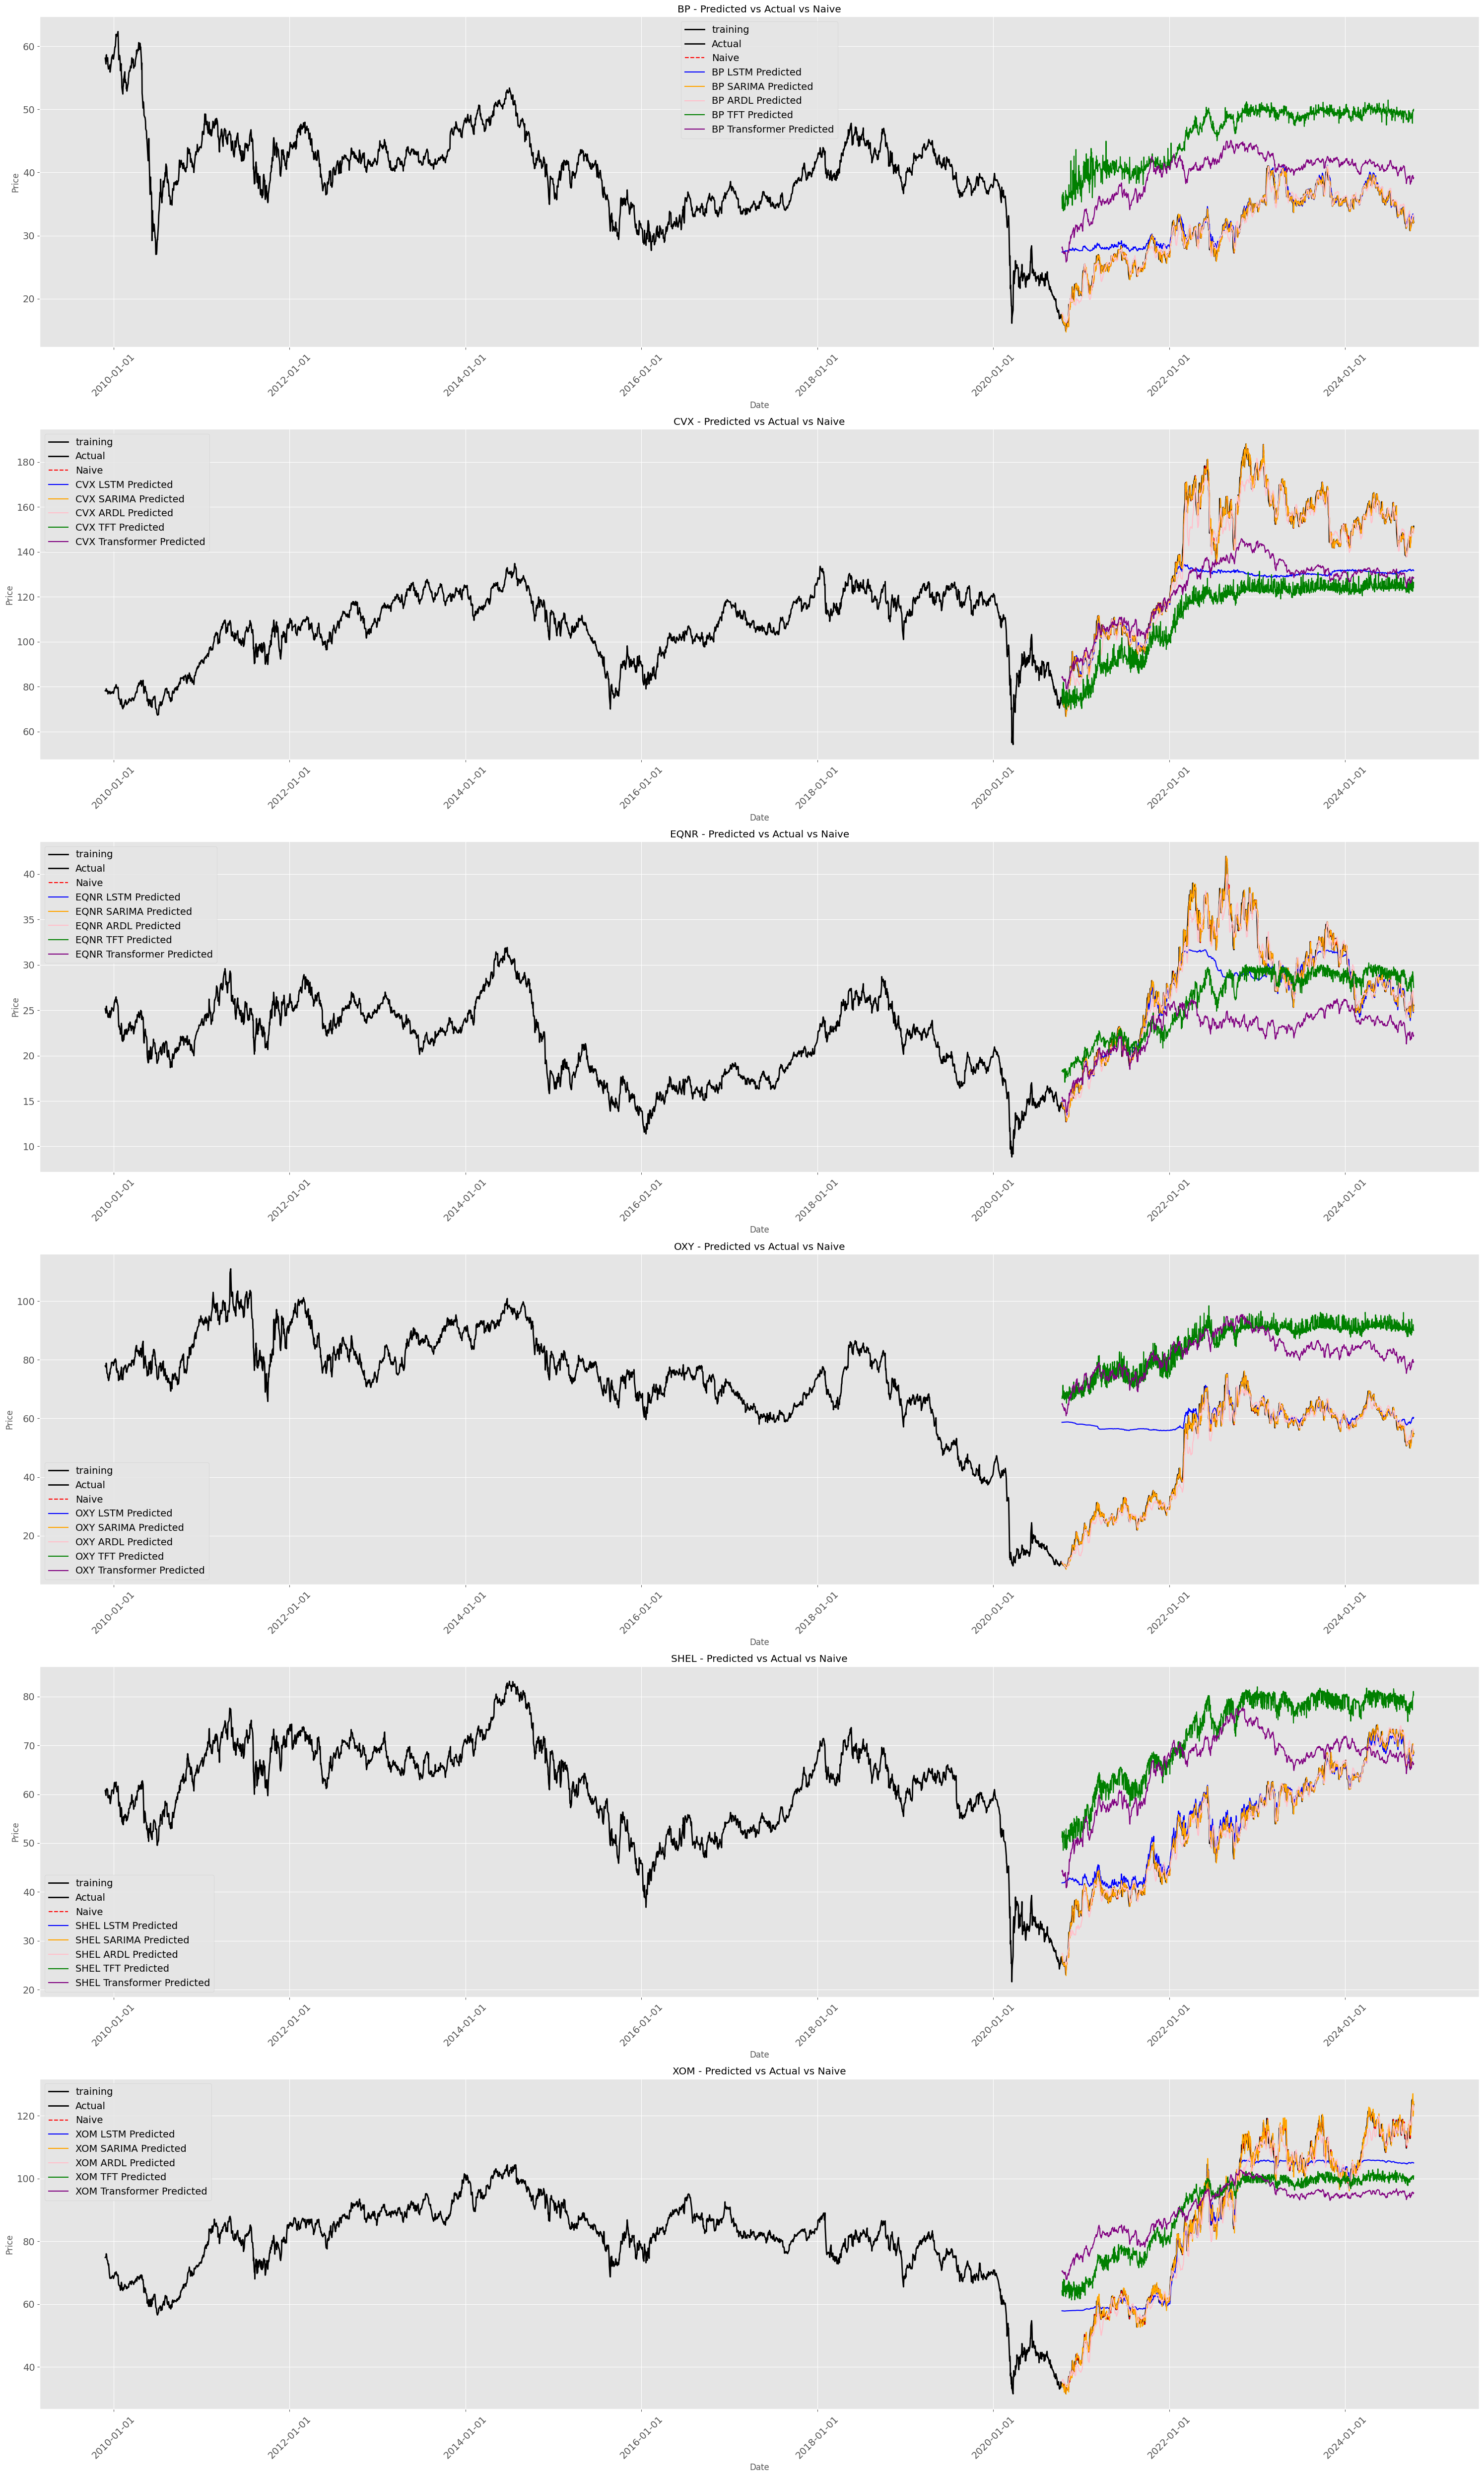

In [19]:
stocks = ['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM']
plot_all_stocks_matplotlib_with_training(stocks)

# Step 4: MAE and MASE

In [20]:
def calculate_mae_and_mase(stocks):
    """
    Calculates MAE and MASE for LSTM, TFT, and naive predictions for the given stocks.

    Parameters:
    - stocks: List of stock symbols to evaluate.

    Returns:
    - A DataFrame containing MAE and MASE for each model and stock.
    """
    results = []

    for stock in stocks:
        # Get actual values
        actual_values = df_actual[stock].values

        # Get predictions from each model
        lstm_predictions = df_lstm[stock].values
        tft_predictions = df_TFT_filtered[stock].values
        naive_predictions = df_naive[stock].values
        transformer_predictions = df_transformer_filtered[stock].values
        ardl_predictions = df_ardl[stock].values
        sarima_predictions = df_sarima_filtered[stock].values

        # Calculate MAE for each model
        mae_lstm = np.mean(np.abs(actual_values - lstm_predictions))
        mae_tft = np.mean(np.abs(actual_values - tft_predictions))
        mae_naive = np.mean(np.abs(actual_values - naive_predictions))
        mae_transformer = np.mean(np.abs(actual_values - transformer_predictions))
        mae_ardl = np.mean(np.abs(actual_values - ardl_predictions))
        mae_sarima = np.mean(np.abs(actual_values - sarima_predictions))

        # Calculate MASE
        # MASE = MAE / Mean Absolute Error of the naive forecast
        # Calculate the mean absolute error of the naive forecast
        naive_mae = np.mean(np.abs(actual_values[1:] - actual_values[:-1]))  # MAE of naive prediction

        # Calculate MASE for each model
        mase_lstm = mae_lstm / naive_mae
        mase_tft = mae_tft / naive_mae
        mase_naive = mae_naive / naive_mae
        mase_transformer = mae_transformer / naive_mae
        mase_ardl = mae_ardl / naive_mae
        mase_sarima = mae_sarima / naive_mae

        # Append results to the list
        results.append({
            'Stock': stock,
            'MAE_SARIMA': mae_sarima,
            'MAE_ARDL': mae_ardl,
            'MAE_LSTM': mae_lstm,
            'MAE_Transformer': mae_transformer,
            'MAE_TFT': mae_tft,
            'MAE_Naive': mae_naive,
            'MASE_SARIMA': mase_sarima,
            'MASE_ARDL': mase_ardl,
            'MASE_LSTM': mase_lstm,
            'MASE_Transformer': mase_transformer,
            'MASE_TFT': mase_tft,
            'MASE_Naive': mase_naive
        })

    # Create a DataFrame from results
    results_df = pd.DataFrame(results)
    return results_df

In [21]:
stocks = ['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM']
mae_mase_results = calculate_mae_and_mase(stocks)
mae_mase_results

,Stock,MAE_SARIMA,MAE_ARDL,MAE_LSTM,MAE_Transformer,MAE_TFT,MAE_Naive,MASE_SARIMA,MASE_ARDL,MASE_LSTM,MASE_Transformer,MASE_TFT,MASE_Naive
0,BP,0.422820,0.776526,1.470894,8.299430,14.551398,0.425968,0.991902,1.821666,3.450597,19.469781,34.136385,0.999287
1,CVX,1.727547,3.536926,19.196334,18.399701,28.007562,1.747925,0.987646,2.022077,10.974632,10.519194,16.012052,0.999296
2,EQNR,0.446771,0.789462,1.722747,5.265900,3.430467,0.450963,0.989938,1.749259,3.817197,11.667979,7.601097,0.999227
3,OXY,0.909766,1.844026,11.630074,32.532958,35.743421,0.918868,0.989121,2.004874,12.644527,35.370700,38.861202,0.999018
4,SHEL,0.675332,1.246317,1.717405,12.577903,18.076181,0.680924,0.991324,1.829476,2.520989,18.463179,26.534134,0.999532
5,XOM,1.450646,2.489445,5.252211,16.335119,12.544170,1.205233,1.202536,2.063666,4.353904,13.541258,10.398690,0.999098


# Step 5: Directional Accuracy

In [22]:
def calculate_directional_accuracy(stocks):
    """
    Calculates the directional accuracy for LSTM, TFT, and naive predictions for the given stocks.

    Parameters:
    - stocks: List of stock symbols to evaluate.

    Returns:
    - A DataFrame containing directional accuracy for each model and stock.
    """
    results = []

    for stock in stocks:
        # Get actual and predicted values
        actual_values = df_actual[stock].values
        lstm_predictions = df_lstm[stock].values
        tft_predictions = df_TFT_filtered[stock].values
        transformer_predictions = df_transformer_filtered[stock].values
        naive_predictions = df_naive[stock].values
        ardl_predictions = df_ardl[stock].values
        sarima_predictions = df_sarima_filtered[stock].values

        # Calculate directional accuracy
        def directional_accuracy(actual, predictions):
            # Calculate direction (1 for increase, 0 for decrease)
            actual_direction = np.sign(np.diff(actual))
            predicted_direction = np.sign(np.diff(predictions))

            # Compare directions and calculate accuracy
            correct_predictions = np.sum(actual_direction == predicted_direction)
            total_predictions = len(actual_direction)

            # Avoid division by zero
            return correct_predictions / total_predictions if total_predictions > 0 else 0

        # Compute directional accuracy for each model
        accuracy_lstm = directional_accuracy(actual_values, lstm_predictions)
        accuracy_tft = directional_accuracy(actual_values, tft_predictions)
        accuracy_transformer = directional_accuracy(actual_values, transformer_predictions)
        accuracy_naive = directional_accuracy(actual_values, naive_predictions)
        accuracy_ardl = directional_accuracy(actual_values, ardl_predictions)
        accuracy_sarima = directional_accuracy(actual_values, sarima_predictions)

        # Append results to the list
        results.append({
            'Stock': stock,
            'Directional_Accuracy_SARIMA': accuracy_sarima,
            'Directional_Accuracy_ARDL': accuracy_ardl,
            'Directional_Accuracy_LSTM': accuracy_lstm,
            'Directional_Accuracy_Transformer': accuracy_transformer,
            'Directional_Accuracy_TFT': accuracy_tft,
            'Directional_Accuracy_Naive': accuracy_naive
        })

    # Create a DataFrame from results
    results_df = pd.DataFrame(results)
    return results_df

In [23]:
stocks = ['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM']
directional_accuracy_results = calculate_directional_accuracy(stocks)
directional_accuracy_results

,Stock,Directional_Accuracy_SARIMA,Directional_Accuracy_ARDL,Directional_Accuracy_LSTM,Directional_Accuracy_Transformer,Directional_Accuracy_TFT,Directional_Accuracy_Naive
0,BP,0.516899,0.629225,0.500994,0.491054,0.475149,0.500994
1,CVX,0.530815,0.658052,0.472167,0.504970,0.482107,0.522863
2,EQNR,0.529821,0.654076,0.489066,0.490060,0.466203,0.515905
3,OXY,0.506958,0.633201,0.494036,0.485089,0.502982,0.489066
4,SHEL,0.507952,0.643141,0.493042,0.475149,0.504970,0.500000
5,XOM,0.500994,0.648111,0.512922,0.501988,0.497018,0.530815


In [24]:
def plot_confusion_matrix(stocks):
    """
    Plots confusion matrices for directional accuracy of LSTM, TFT, and naive predictions for the given stocks.

    Parameters:
    - stocks: List of stock symbols to evaluate.
    """
    for stock in stocks:
        # Get actual and predicted values
        actual_values = df_actual[stock].values
        lstm_predictions = df_lstm[stock].values
        tft_predictions = df_TFT_filtered[stock].values
        transformer_predictions = df_transformer_filtered[stock].values
        naive_predictions = df_naive[stock].values
        ardl_predictions = df_ardl[stock].values
        sarima_predictions = df_sarima_filtered[stock].values

        # Calculate direction (1 for increase, -1 for decrease, 0 for no change)
        actual_direction = np.sign(np.diff(actual_values))
        lstm_direction = np.sign(np.diff(lstm_predictions))
        tft_direction = np.sign(np.diff(tft_predictions))
        transformer_direction = np.sign(np.diff(transformer_predictions))
        naive_direction = np.sign(np.diff(naive_predictions))
        ardl_direction= np.sign(np.diff(ardl_predictions))
        sarima_direction = np.sign(np.diff(sarima_predictions))

        # Create confusion matrices
        lstm_cm = confusion_matrix(actual_direction[1:], lstm_direction[1:], labels=[1, -1])
        tft_cm = confusion_matrix(actual_direction[1:], tft_direction[1:], labels=[1, -1])
        transformer_cm = confusion_matrix(actual_direction[1:], transformer_direction[1:], labels=[1, -1])
        naive_cm = confusion_matrix(actual_direction[1:], naive_direction[1:], labels=[1, -1])
        ardl_cm = confusion_matrix(actual_direction[1:], ardl_direction[1:], labels=[1, -1])
        sarima_cm = confusion_matrix(actual_direction[1:], sarima_direction[1:], labels=[1, -1])

        # Plotting
        fig, axes = plt.subplots(1, 6, figsize=(15, 5))
        fig.suptitle(f'Confusion Matrix for {stock}')

        # SARIMA Confusion Matrix
        disp_sarima = ConfusionMatrixDisplay(confusion_matrix=sarima_cm, display_labels=['Increase', 'Decrease'])
        disp_sarima.plot(ax=axes[0], colorbar=False, cmap='Blues')
        axes[0].set_title('SARIMA Predictions')
        axes[0].grid(False)  # Remove grid lines

        # ARDL Confusion Matrix
        disp_ardl = ConfusionMatrixDisplay(confusion_matrix=ardl_cm, display_labels=['Increase', 'Decrease'])
        disp_ardl.plot(ax=axes[1], colorbar=False, cmap='Blues')
        axes[1].set_title('ARDL Predictions')
        axes[1].grid(False)  # Remove grid lines

        # LSTM Confusion Matrix
        disp_lstm = ConfusionMatrixDisplay(confusion_matrix=lstm_cm, display_labels=['Increase', 'Decrease'])
        disp_lstm.plot(ax=axes[2], colorbar=False, cmap='Blues')
        axes[2].set_title('LSTM Predictions')
        axes[2].grid(False)  # Remove grid lines

        # TFT Confusion Matrix
        disp_tft = ConfusionMatrixDisplay(confusion_matrix=tft_cm, display_labels=['Increase', 'Decrease'])
        disp_tft.plot(ax=axes[3], colorbar=False, cmap='Blues')
        axes[3].set_title('TFT Predictions')
        axes[3].grid(False)  # Remove grid lines

        # TFT Confusion Matrix
        disp_transformer = ConfusionMatrixDisplay(confusion_matrix=transformer_cm, display_labels=['Increase', 'Decrease'])
        disp_transformer.plot(ax=axes[4], colorbar=False, cmap='Blues')
        axes[4].set_title('Transformer Predictions')
        axes[4].grid(False)  # Remove grid lines

        # Naive Confusion Matrix
        disp_naive = ConfusionMatrixDisplay(confusion_matrix=naive_cm, display_labels=['Increase', 'Decrease'])
        disp_naive.plot(ax=axes[5], colorbar=False, cmap='Blues')
        axes[5].set_title('Naive Predictions')
        axes[5].grid(False)  # Remove grid lines

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
        plt.show()

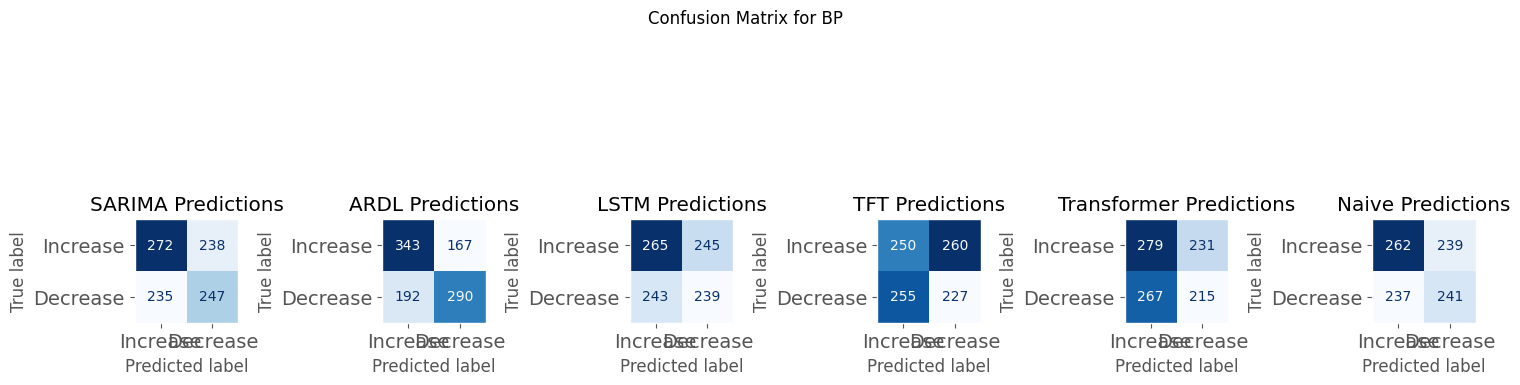

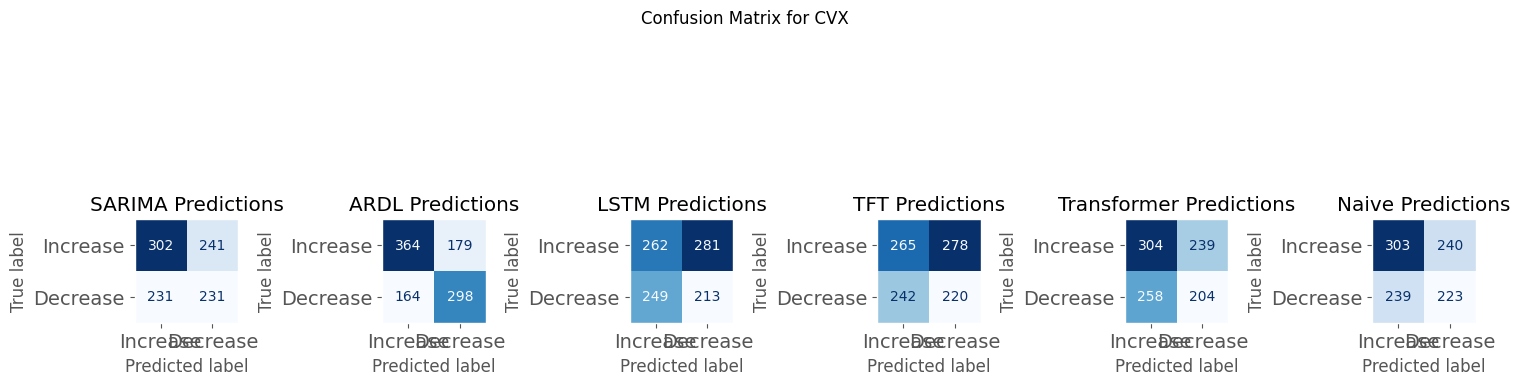

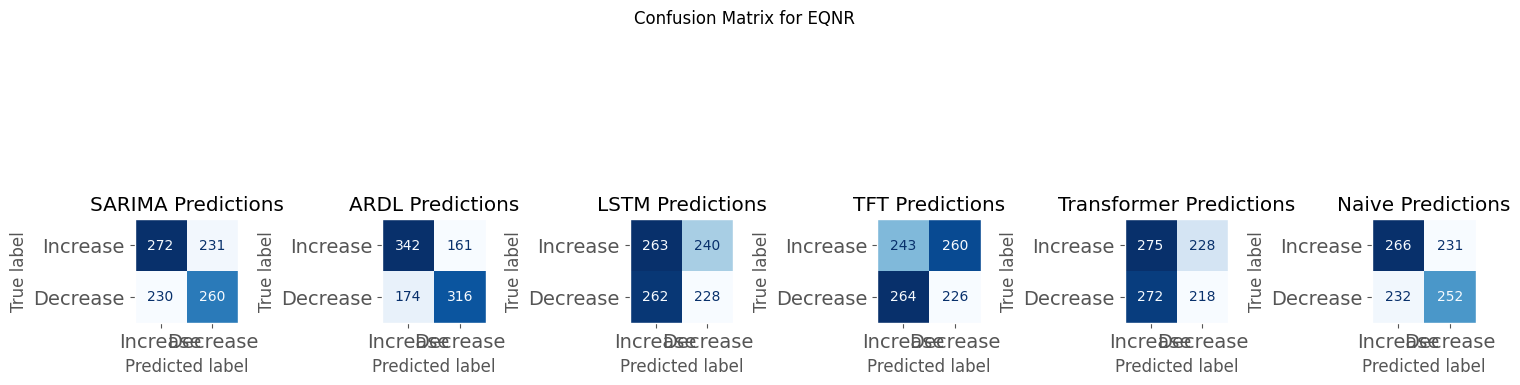

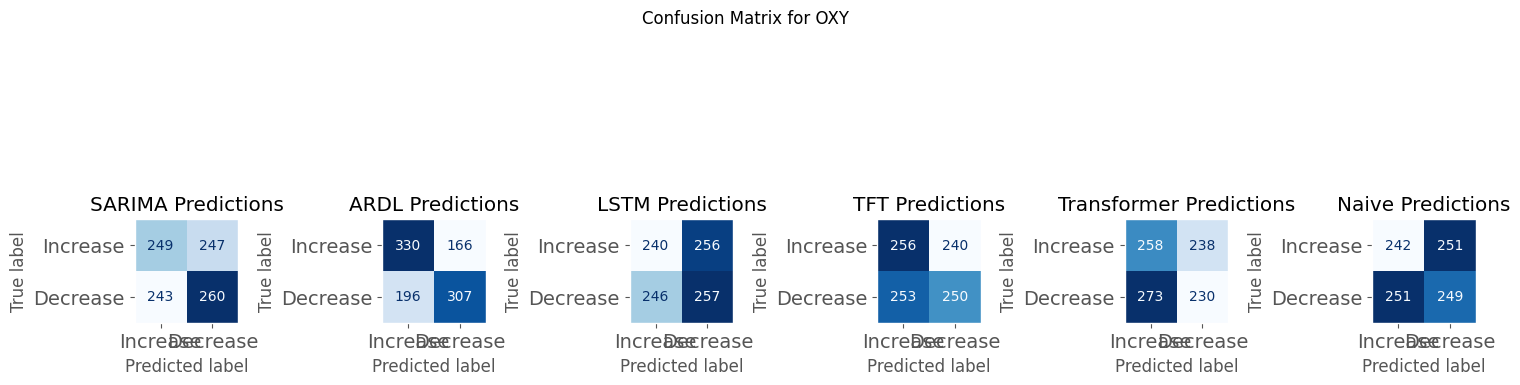

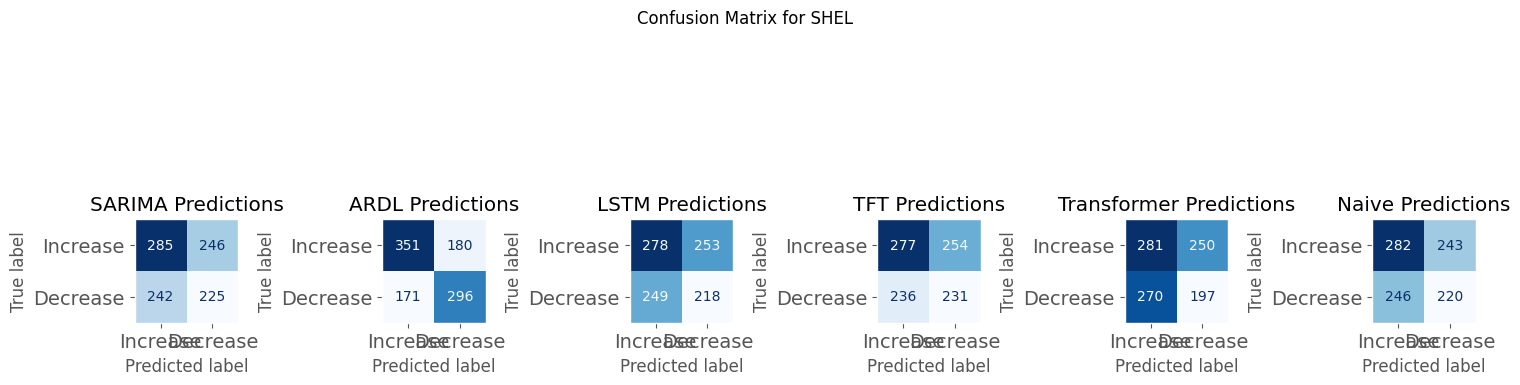

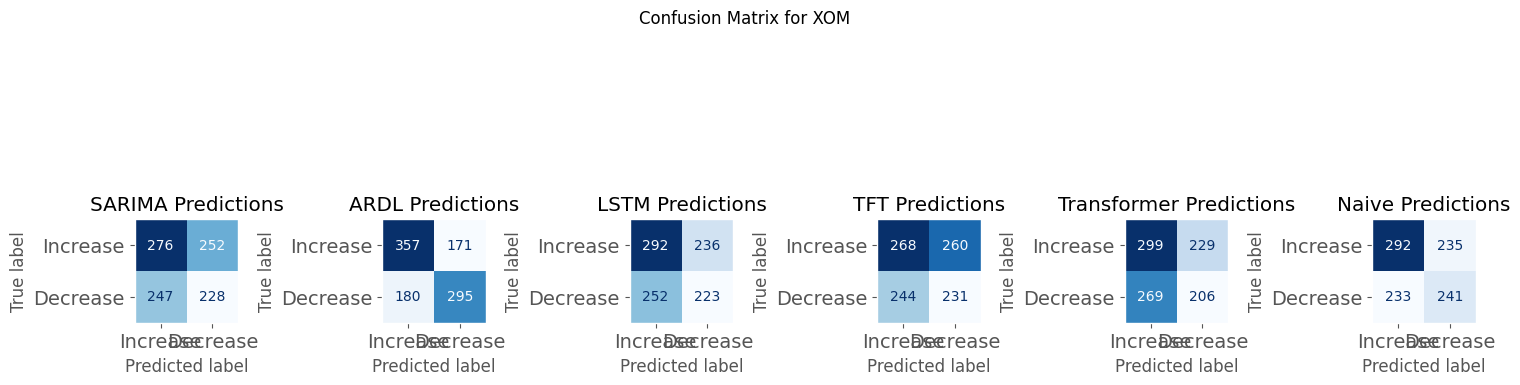

In [25]:
stocks = ['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM']
plot_confusion_matrix(stocks)

# Step 6: Backtest strategy

In [26]:
def backtest_portfolio(stocks, initial_investment=1000):
    final_values = {
        "Stock": [],
        "Final_Portfolio_Value_SARIMA": [],
        "Final_Portfolio_Value_ARDL": [],
        "Final_Portfolio_Value_LSTM": [],
        "Final_Portfolio_Value_Transformer": [],
        "Final_Portfolio_Value_TFT": [],
        "Final_Portfolio_Value_Naive": []
    }

    for stock in stocks:
        # Get prices and predictions
        prices = df_actual[['Date', stock]].set_index('Date')
        sarima_predictions = df_sarima_filtered[stock].values
        ardl_predictions = df_ardl[stock].values
        lstm_predictions = df_lstm[stock].values
        tft_predictions = df_TFT_filtered[stock].values
        transformer_predictions = df_transformer_filtered[stock].values
        naive_predictions = df_naive[stock].values

        # Initialize variables
        investment_sarima = initial_investment
        investment_ardl = initial_investment
        investment_lstm = initial_investment
        investment_tft = initial_investment
        investment_transformer = initial_investment
        investment_naive = initial_investment

        shares_sarima = 0
        shares_ardl = 0
        shares_lstm = 0
        shares_tft = 0
        shares_transformer = 0
        shares_naive = 0

        # Simulate trading based on predictions
        for i in range(len(prices) - 1):
            # Get the previous and next actual prices
            previous_price = prices.iloc[i][stock]
            next_price = prices.iloc[i + 1][stock]

            # SARIMA
            if sarima_predictions[i + 1] > sarima_predictions[i]:
                if shares_sarima == 0:
                    shares_sarima = investment_sarima / previous_price
                    investment_sarima = shares_sarima * next_price
            elif sarima_predictions[i + 1] < sarima_predictions[i]:
                if shares_sarima > 0:
                    investment_sarima = shares_sarima * previous_price
                    shares_sarima = 0

            # ARDL
            if ardl_predictions[i + 1] > ardl_predictions[i]:
                if shares_ardl == 0:
                    shares_ardl = investment_ardl / previous_price
                    investment_ardl = shares_ardl * next_price
            elif ardl_predictions[i + 1] < ardl_predictions[i]:
                if shares_ardl > 0:
                    investment_ardl = shares_ardl * previous_price
                    shares_ardl = 0

            # LSTM
            if lstm_predictions[i + 1] > lstm_predictions[i]:
                if shares_lstm == 0:
                    shares_lstm = investment_lstm / previous_price
                    investment_lstm = shares_lstm * next_price
            elif lstm_predictions[i + 1] < lstm_predictions[i]:
                if shares_lstm > 0:
                    investment_lstm = shares_lstm * previous_price
                    shares_lstm = 0

            # TFT
            if tft_predictions[i + 1] > tft_predictions[i]:
                if shares_tft == 0:
                    shares_tft = investment_tft / previous_price
                    investment_tft = shares_tft * next_price
            elif tft_predictions[i + 1] < tft_predictions[i]:
                if shares_tft > 0:
                    investment_tft = shares_tft * previous_price
                    shares_tft = 0

            # Transformer
            if transformer_predictions[i + 1] > transformer_predictions[i]:
                if shares_transformer == 0:
                    shares_transformer = investment_transformer / previous_price
                    investment_transformer = shares_transformer * next_price
            elif transformer_predictions[i + 1] < transformer_predictions[i]:
                if shares_transformer > 0:
                    investment_transformer = shares_transformer * previous_price
                    shares_transformer = 0

            # Naive
            if naive_predictions[i + 1] > naive_predictions[i]:
                if shares_naive == 0:
                    shares_naive = investment_naive / previous_price
                    investment_naive = shares_naive * next_price
            elif naive_predictions[i + 1] < naive_predictions[i]:
                if shares_naive > 0:
                    investment_naive = shares_naive * previous_price
                    shares_naive = 0

        # Record final portfolio values, formatted to 2 decimal places
        final_values["Stock"].append(stock)
        final_values["Final_Portfolio_Value_SARIMA"].append(f"{investment_sarima:.2f}")
        final_values["Final_Portfolio_Value_ARDL"].append(f"{investment_ardl:.2f}")
        final_values["Final_Portfolio_Value_LSTM"].append(f"{investment_lstm:.2f}")
        final_values["Final_Portfolio_Value_Transformer"].append(f"{investment_transformer:.2f}")
        final_values["Final_Portfolio_Value_TFT"].append(f"{investment_tft:.2f}")
        final_values["Final_Portfolio_Value_Naive"].append(f"{investment_naive:.2f}")

    return pd.DataFrame(final_values)

In [27]:
stocks = ['BP', 'CVX', 'EQNR', 'OXY', 'SHEL', 'XOM']
backtest_results = backtest_portfolio(stocks)
backtest_results

,Stock,Final_Portfolio_Value_SARIMA,Final_Portfolio_Value_ARDL,Final_Portfolio_Value_LSTM,Final_Portfolio_Value_Transformer,Final_Portfolio_Value_TFT,Final_Portfolio_Value_Naive
0,BP,1835.72,41385.17,1220.79,1160.18,1187.26,1769.52
1,CVX,2290.02,34172.77,1061.67,1219.17,895.76,2475.39
2,EQNR,2603.66,52576.39,1262.66,1060.10,1001.25,2114.66
3,OXY,2693.34,315571.40,1305.23,1540.60,4436.94,1569.60
4,SHEL,1722.60,38347.46,1374.92,924.38,1554.29,1604.30
5,XOM,1689.12,50774.57,2650.91,2143.66,1524.35,2775.12
